# New Section

# Task
Build a prediction model for house prices using the data from "/content/House_Price_train.csv".

## Load data

### Subtask:
Load the dataset from `/content/House_Price_train.csv` into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/House_Price_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Explore data

### Subtask:
Perform initial data exploration to understand the dataset's structure, identify potential issues like missing values or outliers, and gain insights into the relationships between features and the target variable (house price).


**Reasoning**:
Perform initial data exploration by checking the info, descriptive statistics, missing values, distribution of the target variable, and correlation with numerical features.



## Prepare Data

### Subtask:
Address missing values and handle outliers in the dataset.

**Reasoning**:
Identify columns with missing values and decide on an appropriate imputation strategy (e.g., mean, median, mode, or a more sophisticated method). Visualize or identify outliers using methods like box plots or z-scores and decide how to handle them (e.g., removal, transformation).

In [5]:
# Identify columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Columns with missing values:\n", missing_values)

# Drop columns with a high percentage of missing values based on current missing values
cols_to_drop = missing_values[missing_values > len(df) * 0.5].index.tolist() # Drop columns with more than 50% missing values
df.drop(columns=cols_to_drop, inplace=True)

# Impute missing values for remaining columns
# For numerical columns, use the median
numerical_cols_with_missing = df.select_dtypes(include=['float64', 'int64']).columns[df.select_dtypes(include=['float64', 'int64']).isnull().any()]
for col in numerical_cols_with_missing:
    df[col] = df[col].fillna(df[col].median())

# For categorical columns, use the mode
categorical_cols_with_missing = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()]
for col in categorical_cols_with_missing:
    df[col] = df[col].fillna(df[col].mode()[0])


# Verify if there are any remaining missing values
print("\nRemaining missing values:\n", df.isnull().sum().sum())

# Identify and handle outliers (example using the 'SalePrice' column)
# import seaborn as sns
# sns.boxplot(x=df['SalePrice'])

# Example outlier handling (replace with appropriate strategy)
# Z-score method
# from scipy.stats import zscore
# df['SalePrice_zscore'] = zscore(df['SalePrice'])
# df_no_outliers = df[(df['SalePrice_zscore'] < 3) & (df['SalePrice_zscore'] > -3)]

# Quantile method
# Q1 = df['SalePrice'].quantile(0.25)
# Q3 = df['SalePrice'].quantile(0.75)
# IQR = Q3 - Q1
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR
# df_no_outliers = df[(df['SalePrice'] > lower_bound) & (df['SalePrice'] < upper_bound)]

Columns with missing values:
 Series([], dtype: int64)

Remaining missing values:
 0


## Explore data

### Subtask:
Perform initial data exploration to understand the dataset's structure, identify potential issues like missing values or outliers, and gain insights into the relationships between features and the target variable (house price).

**Reasoning**:
Perform initial data exploration by checking the info, descriptive statistics, missing values, distribution of the target variable, and correlation with numerical features.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  

None


Descriptive Statistics:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



Missing Values:


,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


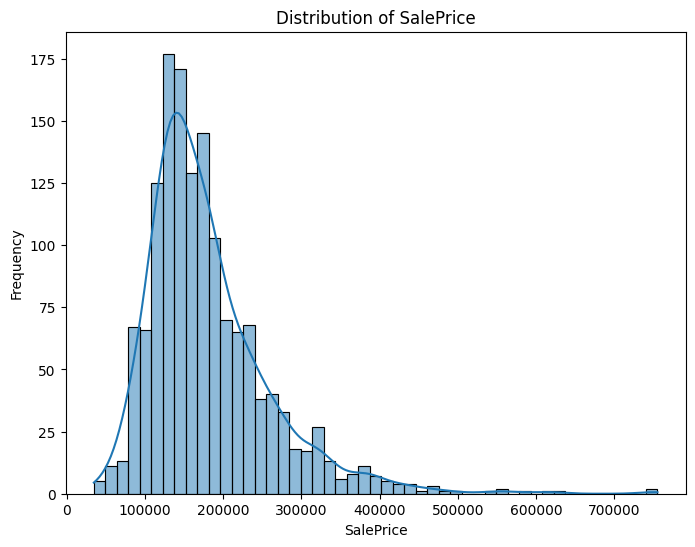


Correlation with SalePrice:


,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [2]:
# Display the information about the dataset
print("Dataset Info:")
display(df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())

# Display the number of missing values per column
print("\nMissing Values:")
display(df.isnull().sum().sort_values(ascending=False))

# Visualize the distribution of the target variable (SalePrice)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Display the correlation of numerical features with SalePrice
print("\nCorrelation with SalePrice:")
display(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False))

### Subtask: Handle Categorical Features

Convert categorical features into a numerical format suitable for modeling.

**Reasoning**: Machine learning models typically require numerical input. We will use one-hot encoding to convert categorical variables into numerical ones.

In [6]:
# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, dummy_na=False)

display(df_encoded.head())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


### Subtask: Split Data

Split the data into training and testing sets.

**Reasoning**: Splitting the data allows us to train the model on one subset and evaluate its performance on unseen data.

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1168, 275)
X_test shape: (292, 275)
y_train shape: (1168,)
y_test shape: (292,)


## Build Model

### Subtask:
Choose an appropriate model and train it on the prepared training data.

**Reasoning**:
We will start with a Linear Regression model as a baseline.

In [8]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


## Evaluate Model

### Subtask:
Assess the model's performance using appropriate metrics (e.g., Mean Squared Error, R-squared) on the testing data.

**Reasoning**:
Evaluate the trained Linear Regression model using Mean Squared Error and R-squared to understand its performance on unseen data.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 886525536.8491571
R-squared: 0.8844214036140368


## Refine Model

### Subtask:
Based on the evaluation results, refine the model or try different models to improve performance.

**Reasoning**:
Based on the evaluation metrics, we can decide if the current model is sufficient or if we need to explore other models or fine-tune the current one.

Here are some potential next steps for refining the model:

*   **Feature Engineering**: Create new features or transform existing ones to potentially improve the model's understanding of the data.
*   **Regularization**: Implement techniques like Lasso or Ridge regression to prevent overfitting, especially with a large number of features after one-hot encoding.
*   **Try Different Models**: Experiment with other regression algorithms like:
    *   **Decision Trees**: Can capture non-linear relationships.
    *   **Random Forests**: Ensemble method that often provides better accuracy and generalization.
    *   **Gradient Boosting (e.g., XGBoost, LightGBM)**: Powerful techniques that can yield high performance.
*   **Hyperparameter Tuning**: Optimize the parameters of the chosen model to improve its performance.
*   **Cross-Validation**: Use cross-validation during training to get a more robust estimate of the model's performance and reduce the risk of overfitting.

## Predict

### Subtask:
Use the trained model to make predictions on new data.

**Reasoning**:
Once the model is refined and evaluated to a satisfactory level, it can be used to predict house prices for new, unseen data. This would involve applying the same preprocessing steps (handling missing values, one-hot encoding) to the new data before making predictions.

## Finish task

### Subtask:
Summarize the findings and the final model.

**Reasoning**:
Present a summary of the data analysis, the model building process, the final model chosen, and its performance metrics. Discuss the insights gained and the potential limitations of the model.